# 主要是运用LDA和贝叶斯判别进行分类，其余模型只是做了展示，介绍调用某些包，具体的参数大家可以自行再进行调整以达到最优。（模型主要就在于调参。）
## 40个人物，这里我把它归为40个类别，通过任意给定一个人脸，来判断其属于哪一类。

### 在本实验中，分别采用了 LDA、贝叶斯分类器、支持向量机、KNN、决策树、随机森林、神经网络.
### 其中LDA和贝叶斯分类效果最好，达到0.975，其次是SVM和RF，而决策树的效果最差，可能是因为参数的问题，以及涉及剪枝的问题。神经网路训练时间最长。由于这里涉及的变量很多，故不推荐使用神经网络，因为很可能链接权重过多导致计算机直接卡死，这里可以通过降维技术先将变量维度降低，在进行操作，比如用PCA以及更深层次的流行学习等等，大家可以进行学习，尝试。

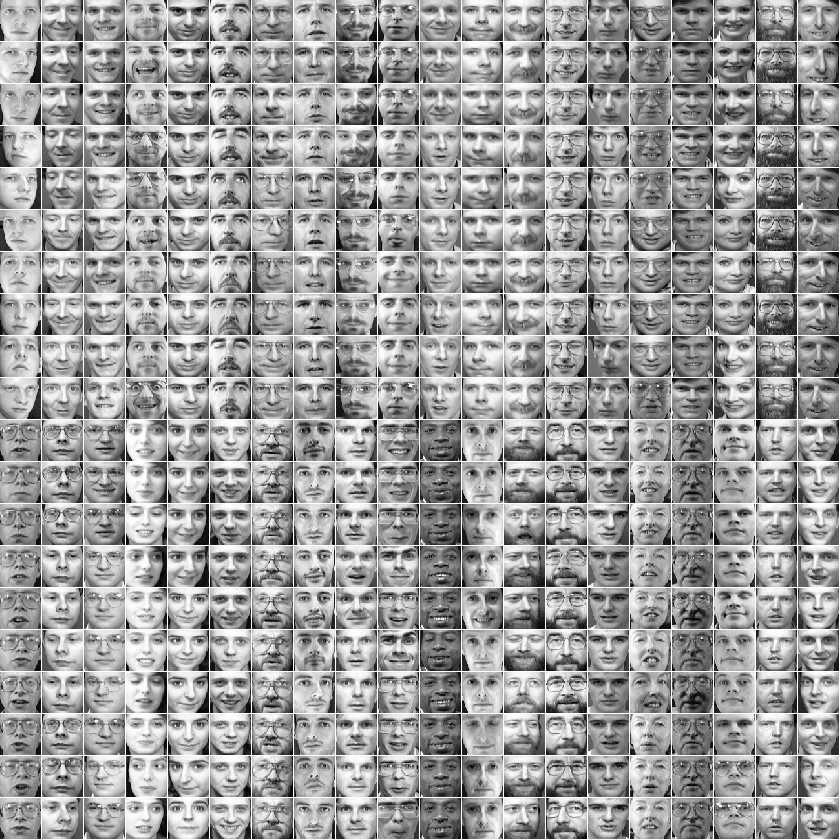

In [2]:
###数据的读取与处理
data = read.csv("data.csv", header=F)
x <- seq(0,1, length=65)
y <- seq(0,1, length=65)
z <- matrix(0, 400, 64*64)
par(mar=c(0.01,0.01,0.01,0.01), mfcol=c(20,20)) 
for( i in 1:400){
    z1 <- as.numeric(data[i,])
    z1 <- matrix(z1, nrow = 64)
    z1 <- z1[,64:1]
    z[i, ] <- matrix(z1, nrow = 1)
    z1 <- matrix(z1, nrow = 64)
    image(x, y, z1 , col=grey(seq(0, 1, length=256)), axes=FALSE)
}


In [23]:
#数据框的生成
a = c()
for(i in 1:40){
    a = c(a,rep(i,10))
#     a = as.factor(a)
}
a = matrix(a,400)
z1 = cbind(z,a)
z1=data.frame(z1)
colnames(z1)[length(colnames(z1))] = 'Y'
#################划分训练集和测试集
T_test = data.frame(matrix(0, 40, 4097))
colnames(T_test)[length(colnames(T_test))] = 'Y'
#划分测试集
for (i in seq(10,400,10)){
    T_test[i/10,] = z1[i,]
}
#划分训练集
zz = z1
zz = zz[-seq(10,400,10),]
T_train = zz
T_test$Y = as.factor(T_test$Y)
T_train$Y = as.factor(T_train$Y)

In [25]:
#####.1.线性判别LDA
library(MASS)
##测试集上模型的预测结果
face.lda=lda(Y~.,data=T_train)
Table = table(T_test$Y,predict(face.lda,T_test[,-4097])$class)
print('LDA模型-判断正确的概率：');
print(sum(diag(prop.table(Table))))

Warning message in lda.default(x, grouping, ...):
"variables are collinear"


[1] "LDA模型-判断正确的概率："
[1] 0.975


In [167]:
###以第4个人物为例，得到其在每一个类别上的概率。
predict(face.lda,T_test[4,-4097])

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
4,1.323476e-50,1.610051e-78,7.459734e-42,1,9.149121e-50,6.425796e-41,1.01893e-109,1.203987e-52,3.675889e-38,1.369746e-104,...,4.554633e-65,1.35258e-71,5.597366e-215,4.653411e-181,1.060031e-97,3.704278e-111,3.969591e-126,5.177579e-47,1.524748e-87,9.163169e-28
,LD1,LD2,LD3,LD4,LD5,LD6,LD7,LD8,LD9,LD10,...,LD30,LD31,LD32,LD33,LD34,LD35,LD36,LD37,LD38,LD39
4,3.47899,-2.15502,1.975381,2.98385,-1.865252,-0.5900017,2.179696,2.272952,-3.794097,-7.15313,...,0.5400505,1.59081,0.9093552,-1.245537,-1.417539,1.054188,-0.4969993,0.8780419,-1.215334,-1.527978


In [128]:
##### .2.贝叶斯判别 (Bayes)
face.Beyes=lda(Y~.,data=T_train,prior=rep(1,40)/40)
Table = table(T_test$Y,predict(face.Beyes,T_test[,-4097])$class)
print('Bayes模型-判断正确的概率：');
print(sum(diag(prop.table(Table))))

Warning message in lda.default(x, grouping, ...):
"variables are collinear"


[1] "Bayes模型-判断正确的概率："
[1] 0.975


In [42]:
##### .3.决策树
#结果不太好，因为里面应该有冗余，需要剪枝
library("rpart")
library("rpart.plot")
face.tree = rpart(Y~.,data = T_train,method = 'class')
# rpart.plot(face.tree)
predict(face.tree, T_test[,-4097], type="class") 
Table = table(T_test$Y,predict(face.tree, T_test[,-4097], type="class") )
print('决策树模型-判断正确的概率：');
print(sum(diag(prop.table(Table))))

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1 13 18 18 13  6  7 12 13 12 32 12 13 14 15 21 32 18 19 20 21 22 23 24 25 25 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 
22 28 29 30 24 32 29 36 34 36 17  5 39 17 
40 Levels: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 40

[1] "决策树模型-判断正确的概率："
[1] 0.525


In [30]:
#########以下的模型只是作为一个展示，具体的参数还需要慢慢调，所以都不是最好的结果，利用某一个包
##### .4.支持向量机
library(e1071) 
set.seed(2)
face.svm  = svm(Y ~ .,data = T_train,kernel = "radial",scale =T) 
pre.forest = predict(face.svm, T_test[,-4097],type='class') 
Table = table(T_test$Y,pre.forest)
Table
print('支持向量机模型-判断正确的概率：');
print(sum(diag(prop.table(Table))))

    pre.forest
     1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
  1  1 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  2  0 1 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  3  0 0 1 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  4  0 0 0 1 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  5  0 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  6  0 0 0 0 0 1 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  7  0 0 0 0 0 0 1 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  8  0 0 0 0 0 0 0 1 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  9  0 0 0 0 0 0 0 0 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  10 0 0 0 0 0 0 0 1 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  11 0 0 0 0 0 0 0 0 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  12 0 0 0 0 0 0 0 0 0  0

[1] "支持向量机模型-判断正确的概率："
[1] 0.95


In [39]:
##### .5.KNN(K近邻算法)
library(kknn)
face.kknn <- kknn(Y~.,T_train[,], T_test[,-4097],k = 2,scale=T, distance =1, kernel= "optimal")  
face.kknn
Fit <- fitted(face.kknn)  
Table = table(Fit, T_test$Y) 
print('KNN模型-判断正确的概率：');
print(sum(diag(prop.table(Table))))

###模型自适应参数选择
# face.tkknn = train.kknn(Y~.,T_train,kernal = c('rectangular','triangular','epanechnikov','optimal'),distance = 2,scale = T)
# face.tkknn


Call:
kknn(formula = Y ~ ., train = T_train[, ], test = T_test[, -4097],     k = 2, distance = 1, kernel = "optimal", scale = T)

Response: "nominal"

[1] "KNN模型-判断正确的概率："
[1] 0.925



Call:
 randomForest(formula = Y ~ ., data = T_train, importance = TRUE,      mtry = 64, ntree = 300) 
               Type of random forest: classification
                     Number of trees: 300
No. of variables tried at each split: 64

        OOB estimate of  error rate: 3.61%
Confusion matrix:
   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
1  9 0 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
2  0 9 0 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
3  0 0 7 0 0 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0
4  1 0 0 7 0 0 0 0 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
5  0 0 0 0 9 0 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
6  0 0 0 0 0 9 0 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
7  0 0 0 0 0 0 9 0 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
8  1 0 0 0 0 0 0 8 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

[1] "随机森林模型-判断正确的概率："
[1] 0.95


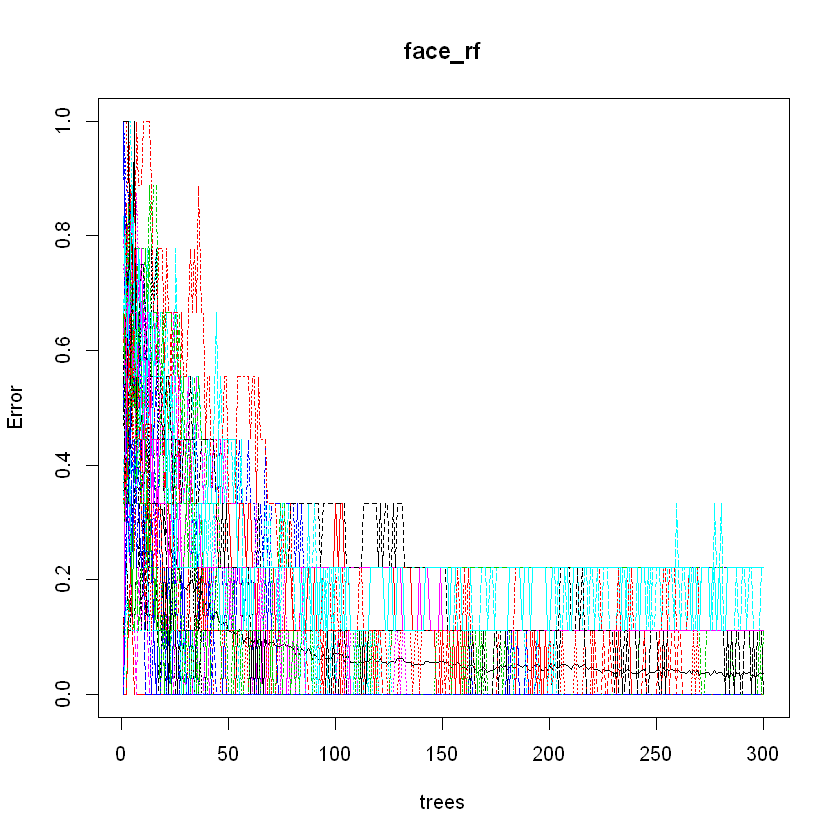

In [50]:
##### .6.随机森林
library('randomForest')
set.seed(124)
n = length(names(T_train))
face_rf = randomForest(Y~.,data = T_train,importance = TRUE,mtry = 64 ,ntree = 300)
plot(face_rf)
face_rf
face_pre = predict(face_rf,T_test[,-4097])
Table = table(face_pre, T_test$Y) 
print('随机森林模型-判断正确的概率：');
print(sum(diag(prop.table(Table))))
##参数mtry选择
# for (i in 1:(n-1)){
#     mt = randomForest(Y~.,data = T_train,mtry = i)
#     err = mean(mt$err.rate)
#     print(err)
# }
# table(T_test$Y,pre.forest)

In [ ]:
##### .7.神经网络
library(nnet)
face.nn = nnet(Y ~ .,data = T_train,size = 2,rang = 0.1,decay = 5e-4,maxit = 200,MaxNWts=9000)
# face.predict = predict(face.nn,T_test,type = "class")
# nn.table = table(T_test$Y,face.predict)
# nn.table